In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [29]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import GaussianNoise

In [30]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

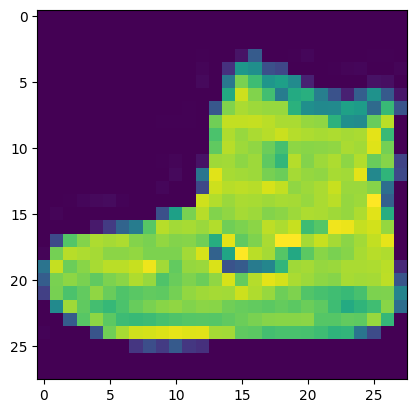

In [31]:
plt.imshow(X_train[0]);

In [32]:
X_train.max()

np.uint8(255)

In [33]:
X_train = X_train / 255
X_test = X_test / 255

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
encoder = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(units=400, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=25, activation='relu'),
])

In [36]:
decoder = Sequential([
    Input(shape=(25,)),
    Dense(units=50, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=28*28, activation='sigmoid'),
    Reshape([28,28])
])

In [37]:
autoencoder = Sequential([encoder, decoder])

In [38]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=[X_test, X_test])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.0628 - loss: 0.4086 - val_accuracy: 0.0973 - val_loss: 0.3121
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0974 - loss: 0.3068 - val_accuracy: 0.1070 - val_loss: 0.3029
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1129 - loss: 0.2985 - val_accuracy: 0.1280 - val_loss: 0.2965
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1317 - loss: 0.2942 - val_accuracy: 0.1444 - val_loss: 0.2931
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1440 - loss: 0.2907 - val_accuracy: 0.1518 - val_loss: 0.2909
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1481 - loss: 0.2879 - val_accuracy: 0.1566 - val_loss: 0.2897
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1550 - loss: 0.2866 - val_accuracy: 0.1592 - val_loss: 0.2870
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1630 - loss: 0.2850 - val_accuracy: 

In [40]:
generated_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


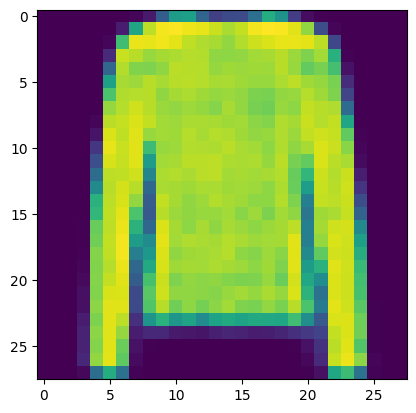

In [41]:
plt.imshow(generated_images[99]);

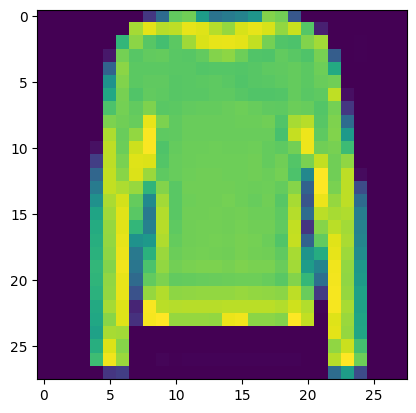

In [42]:
plt.imshow(X_test[99]);

In [43]:
sample = GaussianNoise(0.2)

In [44]:
noisey = sample(X_test[99], training=True)

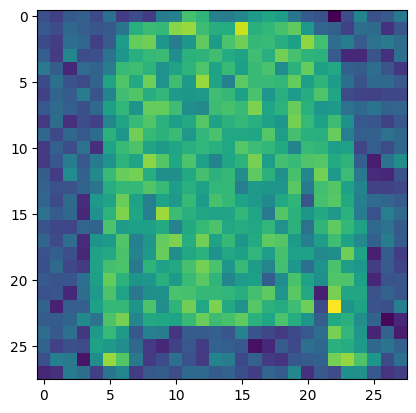

In [45]:
plt.imshow(noisey);

In [46]:
encoder = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    GaussianNoise(0.2),
    Dense(units=400, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=25, activation='relu'),
])

In [47]:
decoder = Sequential([
    Input(shape=(25,)),
    Dense(units=50, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=28*28, activation='sigmoid'),
    Reshape([28,28])
])

In [48]:
noise_remover = Sequential([encoder, decoder])

In [49]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
noise_remover.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=[X_test, X_test])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.0613 - loss: 0.4153 - val_accuracy: 0.0974 - val_loss: 0.3138
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0993 - loss: 0.3097 - val_accuracy: 0.1173 - val_loss: 0.3036
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1228 - loss: 0.3020 - val_accuracy: 0.1340 - val_loss: 0.2990
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1384 - loss: 0.2974 - val_accuracy: 0.1384 - val_loss: 0.2963
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1498 - loss: 0.2936 - val_accuracy: 0.1563 - val_loss: 0.2918
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1570 - loss: 0.2904 - val_accuracy: 0.1589 - val_loss: 0.2905
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1615 - loss: 0.2888 - val_accuracy: 0.1683 - val_loss: 0.2876
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1680 - loss: 0.2875 - val_accuracy: 

In [51]:
noisey_images = sample(X_test, training=True)
denoised_images = noise_remover(noisey_images)

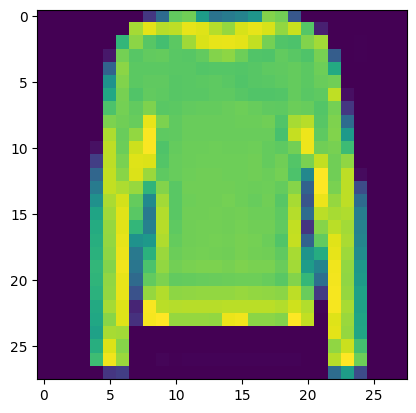

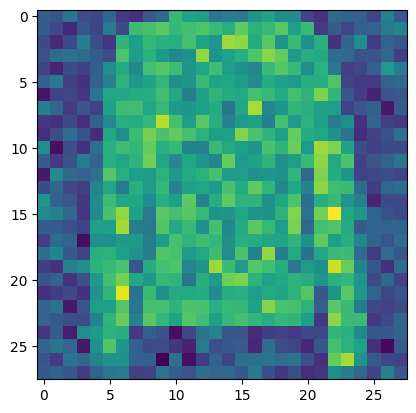

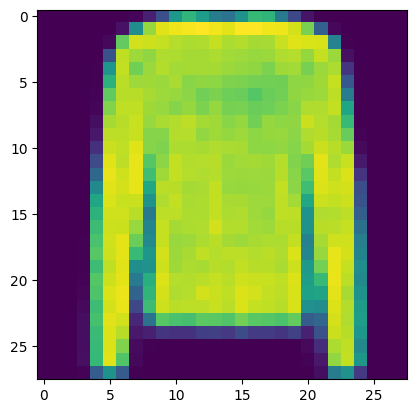

In [52]:
plt.imshow(X_test[99]);
plt.show()
plt.imshow(noisey_images[99]);
plt.show()
plt.imshow(denoised_images[99]);